In [7]:
from importlib import import_module

from utils import DataConfig

x = import_module('models.ShipRNN')  # 动态导入对应训练类
config = x.ModelConfig(freeze=False)  # 创建对应类的配置文件
data_config = DataConfig('word2vec', 50)

In [11]:
import torch

model = x.Model(config, data_config)

#试算一下
vis = model(torch.randint(1, 10, [2, 30]))

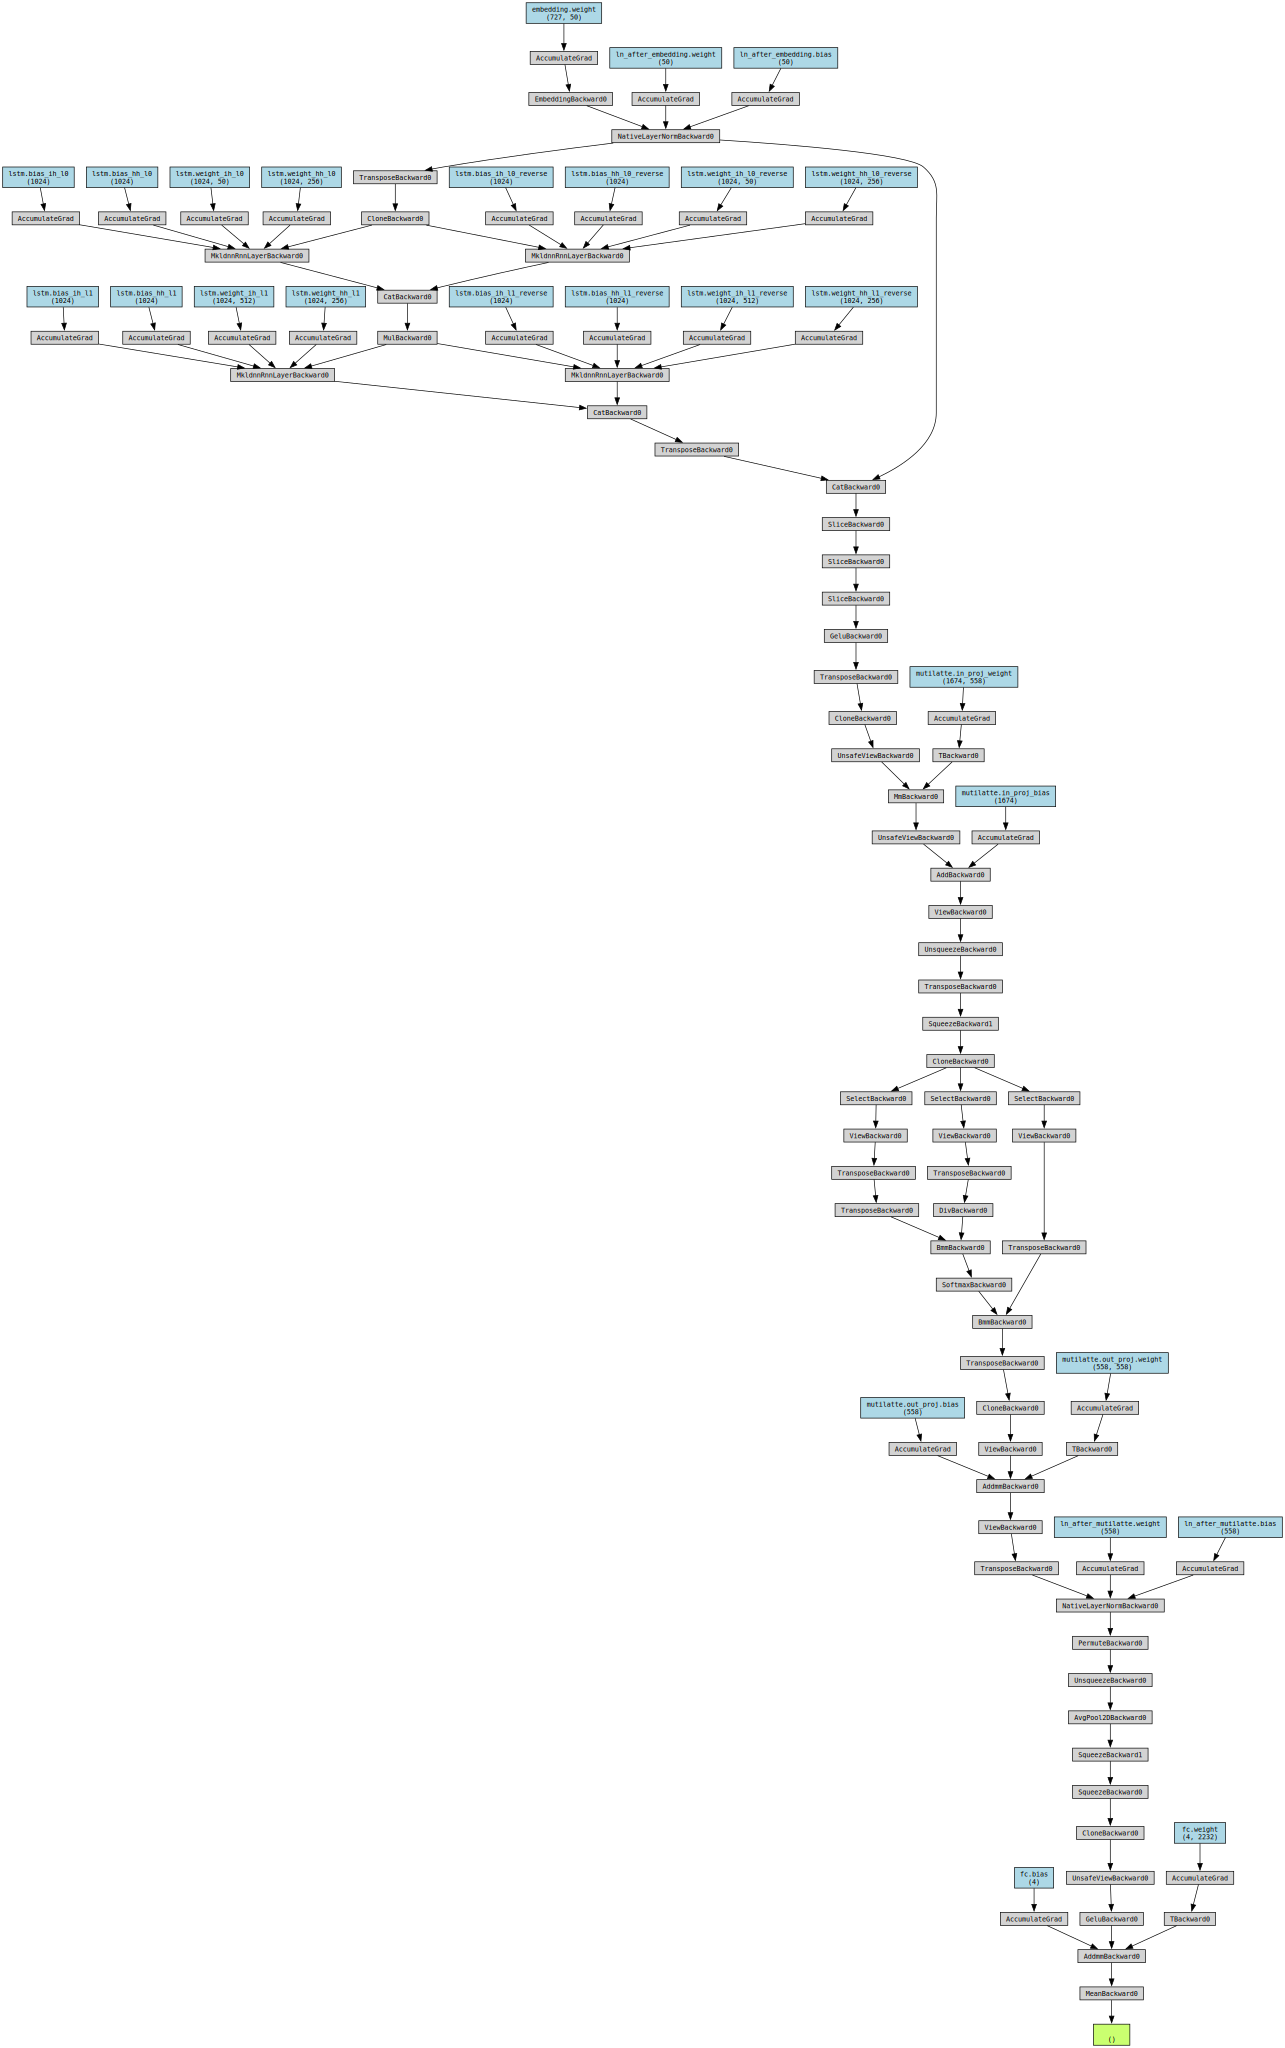

In [12]:
from torchviz import make_dot

make_dot(vis.mean(), params=dict(model.named_parameters()), show_saved=False, show_attrs=False)

In [17]:
from torchinfo import summary

batch_size = 256
summary(model, input_size=(batch_size, 30), dtypes=[torch.long])

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [256, 4]                  --
├─Embedding: 1-1                         [256, 30, 50]             36,350
├─LayerNorm: 1-2                         [256, 30, 50]             100
├─LSTM: 1-3                              [256, 30, 512]            2,207,744
├─MultiheadAttention: 1-4                [256, 30, 558]            1,247,688
├─LayerNorm: 1-5                         [256, 30, 558]            1,116
├─AvgPool1d: 1-6                         [256, 558, 4]             --
├─Flatten: 1-7                           [256, 2232]               --
├─Linear: 1-8                            [256, 4]                  8,932
Total params: 3,501,930
Trainable params: 3,501,930
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 16.97
Input size (MB): 0.06
Forward/backward pass size (MB): 71.89
Params size (MB): 9.02
Estimated Total Size (MB): 80.97